In [193]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
# load the file "spotify-2023.csv' into a DataFrame named dataset
dataset = pd.read_csv('spotify-2023.csv', encoding='latin-1')
dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview of Dataset

In [174]:
# identify any missing values
missing_value = dataset.isnull().sum()
missing_dataset = missing_values[missing_values > 0].reset_index()

# create a dataframe to display the missing values
missing_dataset.columns = ['Column', 'Missing Values']
missing_dataset

,Column,Missing Values
0,in_shazam_charts,50
1,key,95


In [154]:
# identify data types
dataset.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

# Basic Descriptive Statistics

In [177]:
# convert 'streams' column to numeric
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')

# calculate statistics, ignoring NaN values
streams_mean = dataset['streams'].mean()
streams_median = dataset['streams'].median()
streams_std = dataset['streams'].std()

# create a DataFrame for the results
statistics = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Stream Value': [streams_mean, streams_median, streams_std]})

# format the DataFrame to display two decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
statistics

,Statistic,Stream Value
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


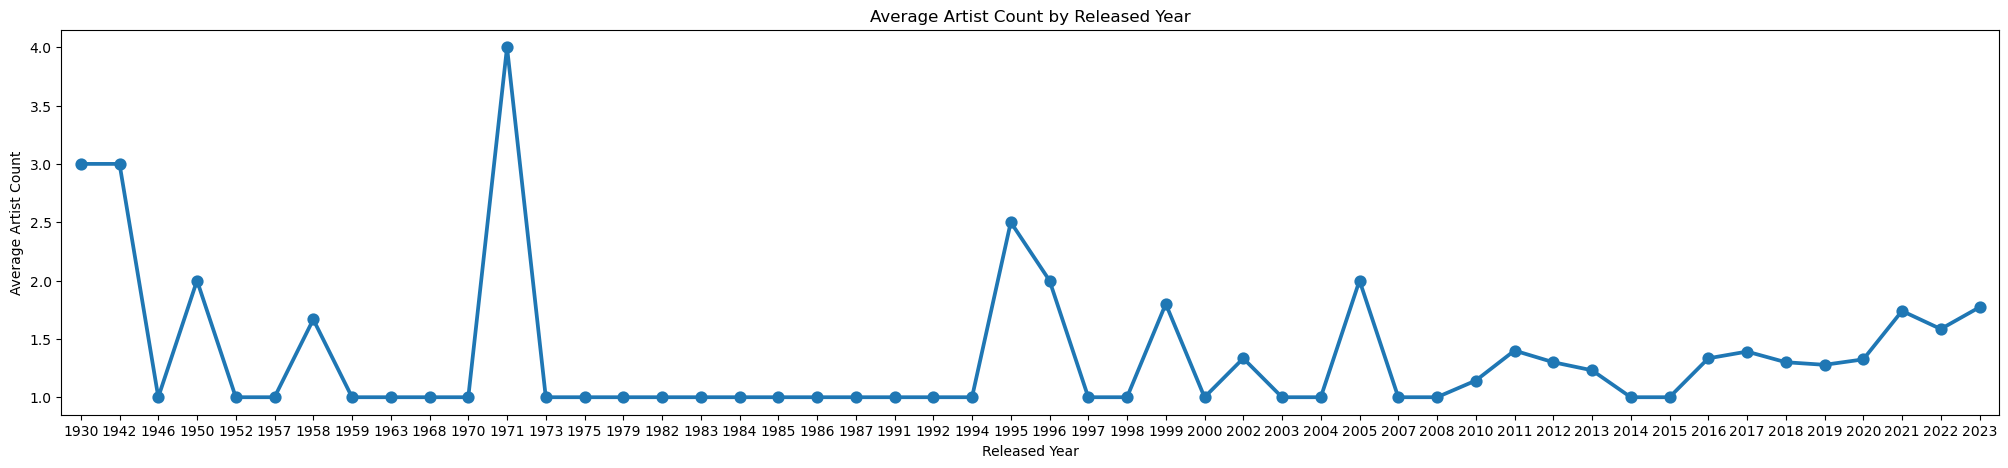

In [178]:
# calculate average artist count per released year (assuming 'artist_count' column)
avg_artists_per_year = dataset.groupby('released_year')['artist_count'].mean()

# create the plot for average artist count per year
plt.figure(figsize=(25, 5))
sns.pointplot(x=avg_artists_per_year.index, y=avg_artists_per_year.values, estimator='mean')
plt.title('Average Artist Count by Released Year')
plt.xlabel('Released Year')
plt.ylabel('Average Artist Count')
plt.show()

# Top Performers

In [183]:
# display the top 5 tracks with highest number of streams
top_tracks_dataset = dataset[['artist(s)_name', 'track_name', 'streams']].sort_values(by='streams', ascending=False).head(5)

# create dataframe
top_tracks_dataset.columns = ['Artist', 'Track', 'Stream Count']
top_tracks_dataset

,Artist,Track,Stream Count
55,The Weeknd,Blinding Lights,3703895074.00
179,Ed Sheeran,Shape of You,3562543890.00
86,Lewis Capaldi,Someone You Loved,2887241814.00
620,Tones and I,Dance Monkey,2864791672.00
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550.00


In [184]:
# display the number of counts of occurrences for each artist
artist_counts = dataset['artist(s)_name'].value_counts()

# create dataframe
top_artists_dataset = pd.DataFrame({'Artist': artist_counts.index, 'Count': artist_counts.values}).head(5)
top_artists_dataset

,Artist,Count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


# Temporal Trends

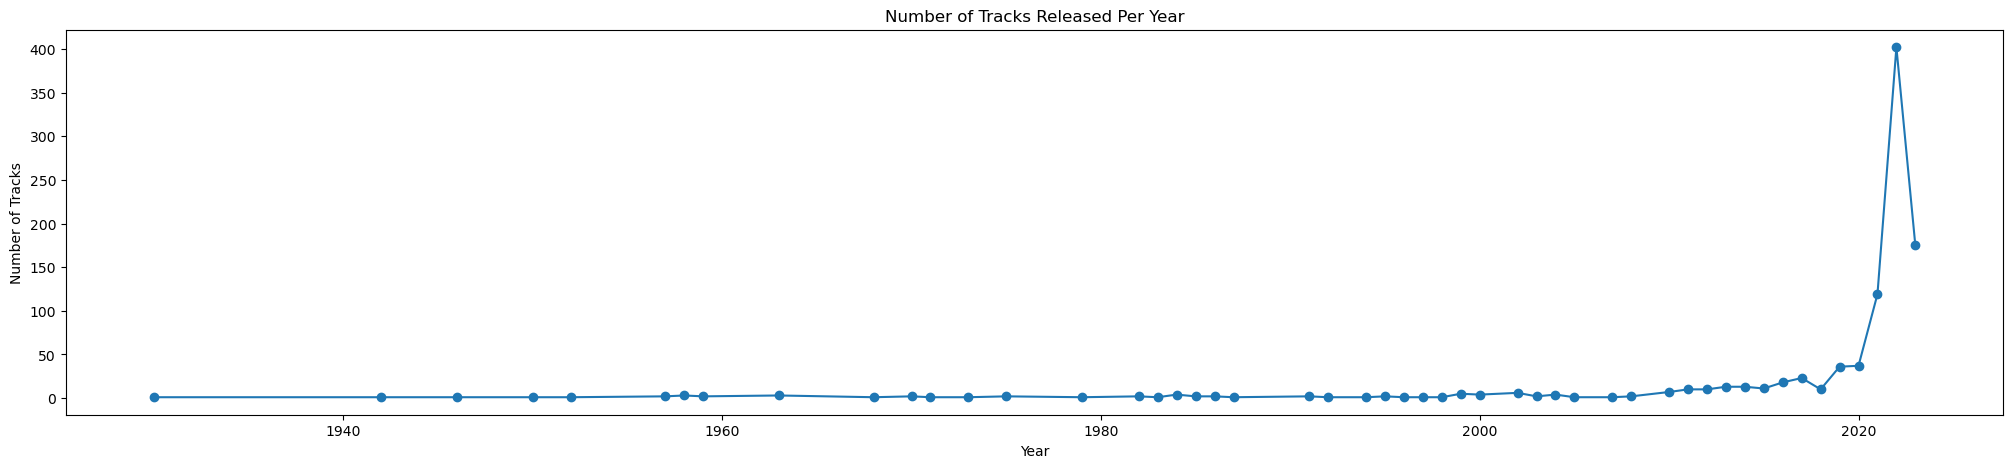

In [185]:
# create a plot for number of tracks released per year
plt.figure(figsize=(25, 5))
tracks_per_year = dataset['released_year'].value_counts().sort_index()
tracks_per_year.plot(ls='-', marker = 'o')
plt.title("Number of Tracks Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Tracks")
plt.show()

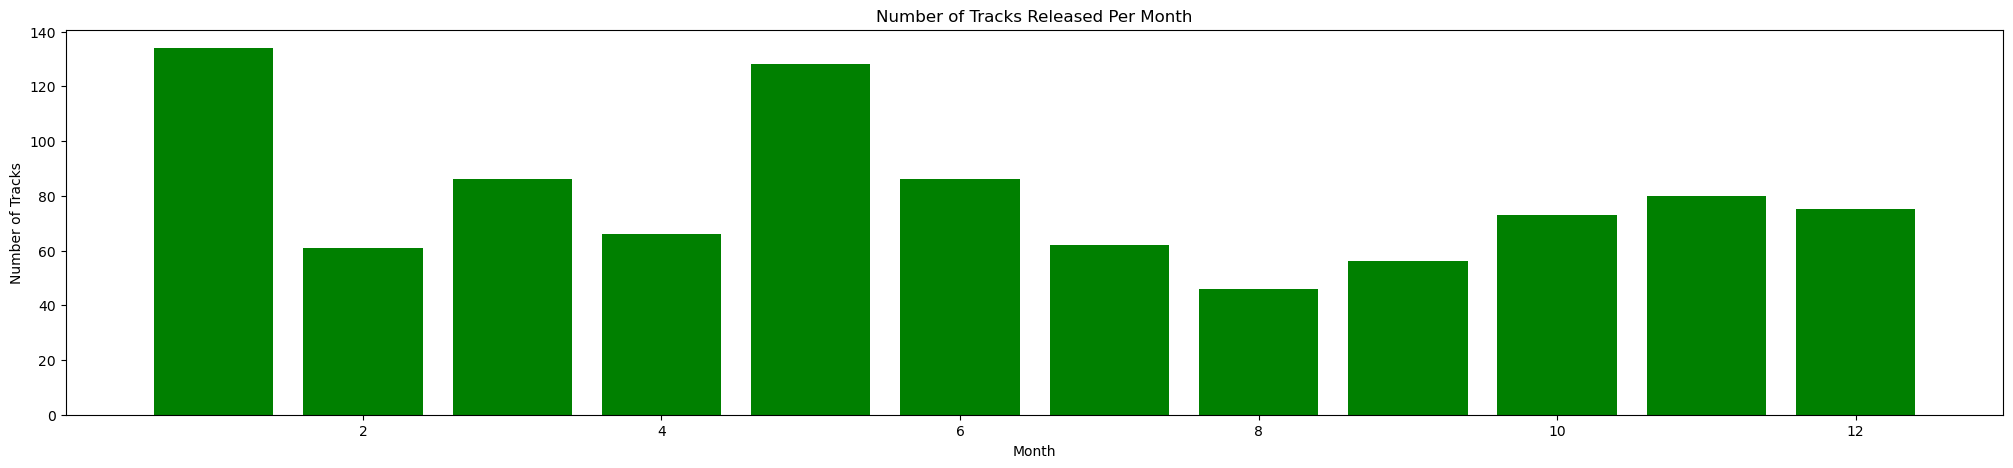

In [186]:
# create a bar plot for number of tracks released per month
plt.figure(figsize=(25, 5))
tracks_per_month = dataset['released_month'].value_counts().sort_index()
plt.bar(tracks_per_month.index, tracks_per_month.values, color='g') 
plt.title("Number of Tracks Released Per Month") 
plt.xlabel("Month")
plt.ylabel("Number of Tracks")
plt.show()

# Genre and Music Characteristics

<function matplotlib.pyplot.show(close=None, block=None)>

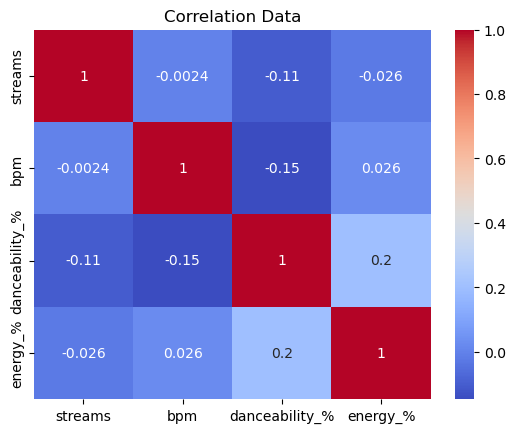

In [187]:
# set the data to corrolate
correlation_data = dataset[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

# create a correlation matrix
sns.heatmap(correlation_data, annot = True, cmap = 'coolwarm')
plt.title("Correlation Data")
plt.show 

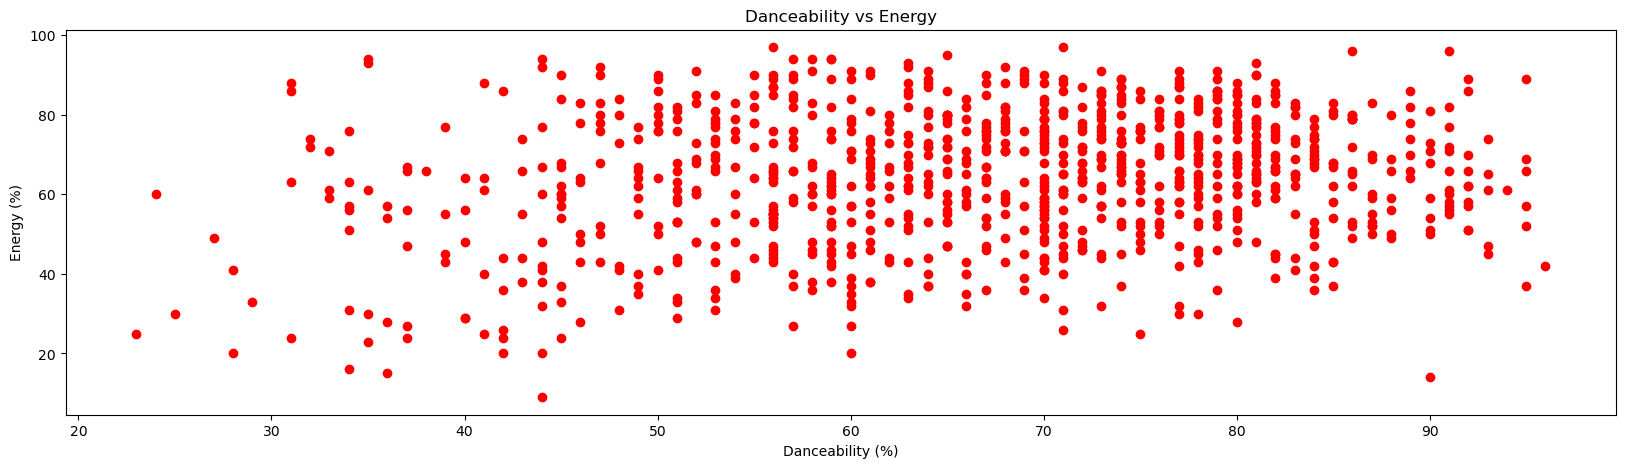

In [188]:
# create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(dataset['danceability_%'], dataset['energy_%'], color='r')
plt.title("Danceability vs Energy")
plt.xlabel("Danceability (%)")
plt.ylabel("Energy (%)")
plt.show()

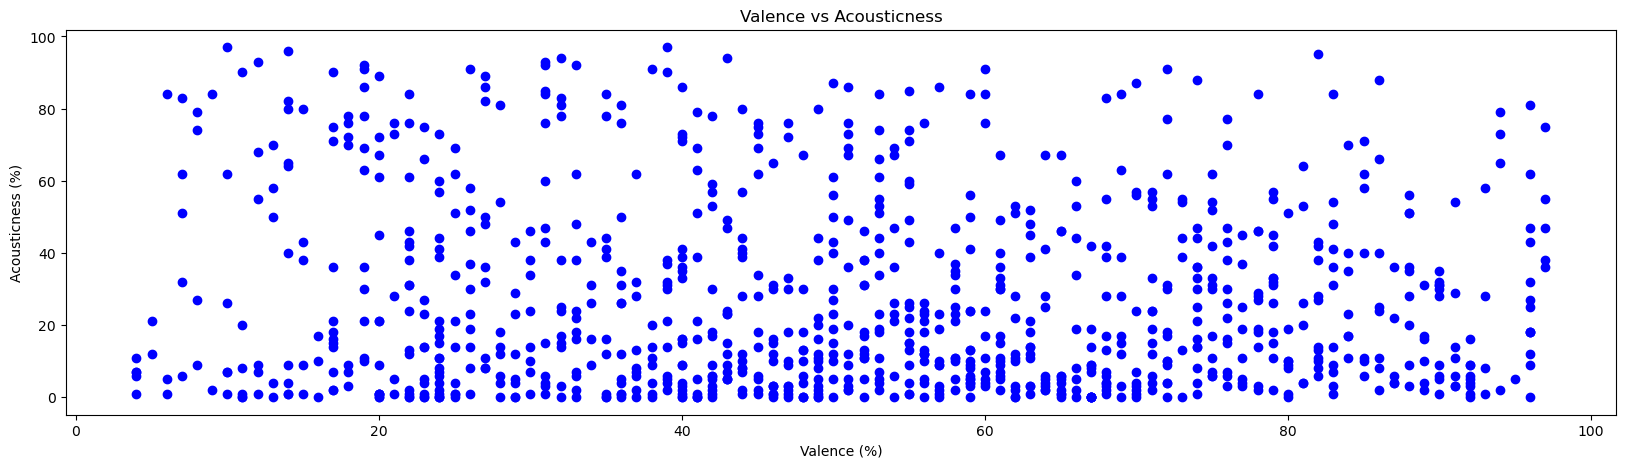

In [189]:
# create a scatter plot
plt.figure(figsize=(20, 5))
plt.scatter(dataset['valence_%'], dataset['acousticness_%'], color='b')
plt.title("Valence vs Acousticness")
plt.xlabel("Valence (%)")
plt.ylabel("Acousticness (%)")
plt.show()

# Platform Popularity

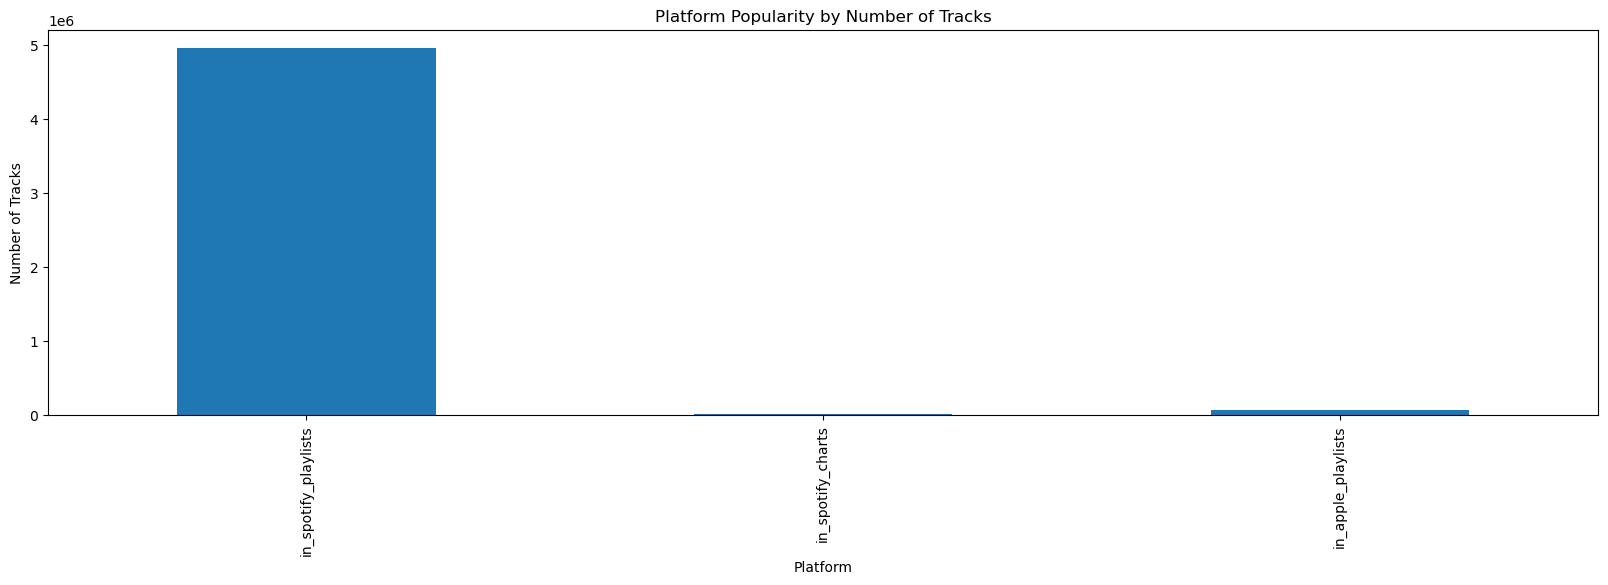

In [190]:
# create a bar plot using the three columns
platform_popularity = dataset[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum()
plt.figure(figsize=(20, 5))
platform_popularity.plot(kind='bar')
plt.title("Platform Popularity by Number of Tracks")
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.show()

# Advanced Analysis

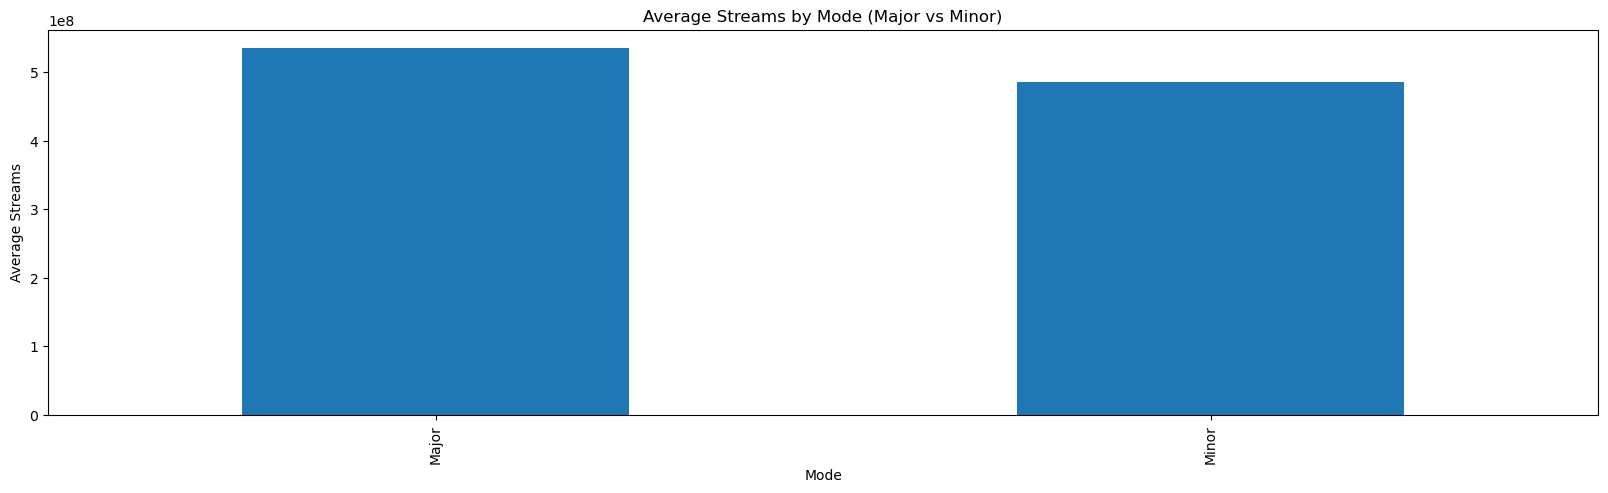

In [191]:
# create a bar plot to identify patterns in key or mode
mode_pattern = dataset.groupby('mode')['streams'].mean()
plt.figure(figsize=(20, 5))
mode_pattern.plot(kind='bar')
plt.title("Average Streams by Mode (Major vs Minor)")
plt.xlabel("Mode")
plt.ylabel("Average Streams")
plt.show()

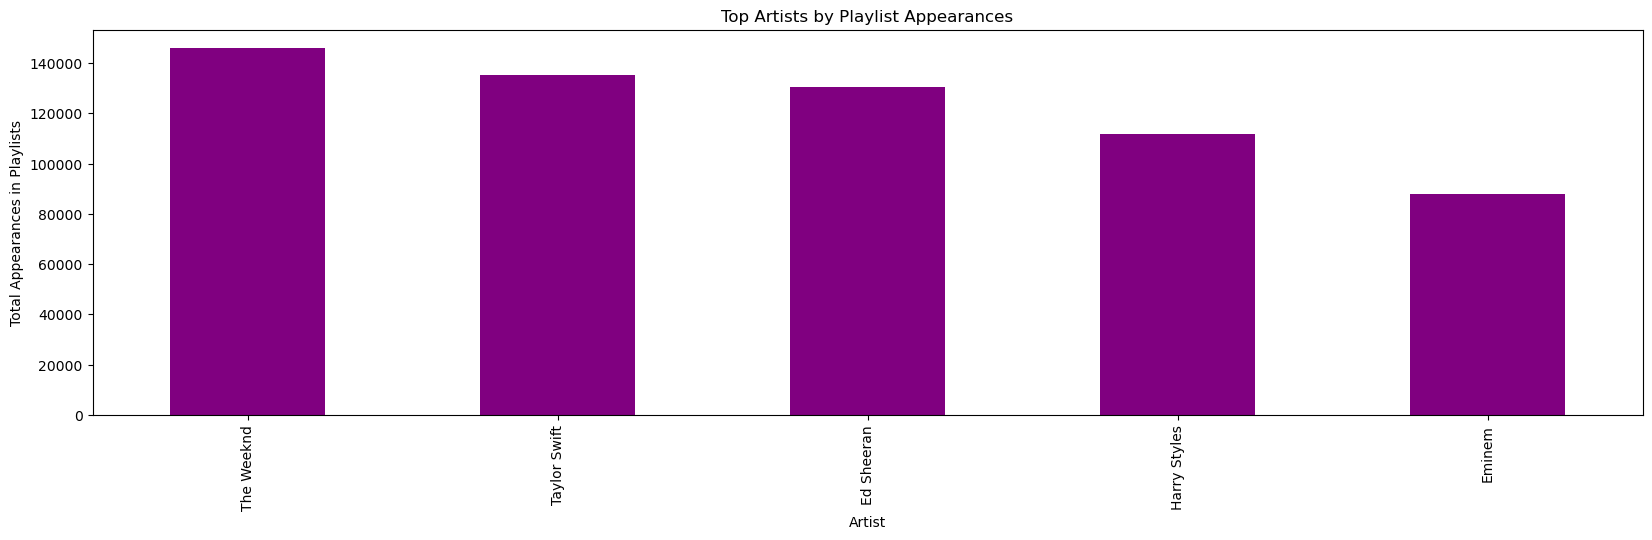

In [192]:
# create a bar plot for the most frequently appearing artists in playlists
artist_playlist = (dataset.groupby('artist(s)_name')[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists']].sum().sum(axis=1).sort_values(ascending=False).head())
plt.figure(figsize=(20, 5))
artist_playlist.plot(kind='bar', color='purple')
plt.title("Top Artists by Playlist Appearances")
plt.xlabel("Artist")
plt.ylabel("Total Appearances in Playlists")
plt.show()